In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_curve, ConfusionMatrixDisplay, confusion_matrix, RocCurveDisplay, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
import sklearn.metrics as skm


In [2]:
df = pd.read_csv("../data/smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


In [3]:
df.columns = ['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting_blood_sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum_creatinine', 'AST', 'ALT', 'Gtp', 'oral', 'dental_caries',
       'tartar', 'smoking']

In [4]:
df.drop("ID", axis = 1, inplace = True)

In [5]:
df[df.columns].select_dtypes(int).describe()

,age,height(cm),weight(kg),dental_caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,0.213334,0.367288
std,12.071418,9.194597,12.820306,0.409665,0.482070
min,20.000000,130.000000,30.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,1.000000,1.000000


In [6]:
df[df.columns].select_dtypes(float).describe()

,waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum_creatinine,AST,ALT,Gtp
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,99.312325,196.901422,126.665697,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201
std,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,20.795591,36.297940,71.639817,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539
min,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,8.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000
25%,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000
50%,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000
75%,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000
max,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,505.000000,445.000000,999.000000,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000


In [7]:
means = df.select_dtypes([float, int]).mean()
sds = df.select_dtypes([float, int]).std()

In [8]:
means_and_stds = df.select_dtypes([float, int]).apply(['mean','std']).T
means_and_stds['std'] / means_and_stds['mean'] * 100

age                     27.321459
height(cm)               5.584352
weight(kg)              19.464538
waist(cm)               11.303629
eyesight(left)          48.080409
eyesight(right)         48.237423
hearing(left)           15.396211
hearing(right)          15.549892
systolic                11.256494
relaxation              12.735082
fasting_blood_sugar     20.939588
Cholesterol             18.434575
triglyceride            56.558183
HDL                     25.726782
LDL                     35.599229
hemoglobin              10.699187
Urine protein           37.240435
serum_creatinine        25.010131
AST                     73.923951
ALT                    114.468893
Gtp                    125.876765
dental_caries          192.029957
smoking                131.251302
dtype: float64

In [9]:
cols =[ 'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)']
for col in cols:
    print(df[col].value_counts())

1.2    12746
1.0    12217
1.5     7825
0.8     5267
0.9     5125
0.7     4445
0.6     2508
0.5     2113
0.4     1218
0.3      881
0.2      464
2.0      401
0.1      354
9.9       92
1.6       20
1.3       10
1.1        3
1.9        2
1.8        1
Name: eyesight(left), dtype: int64
1.2    12539
1.0    12498
1.5     7536
0.8     5418
0.9     5277
0.7     4325
0.6     2402
0.5     2160
0.4     1309
0.3      842
0.2      522
2.0      377
0.1      366
9.9       92
1.6       20
1.3        7
1.1        2
Name: eyesight(right), dtype: int64
1.0    54267
2.0     1425
Name: hearing(left), dtype: int64
1.0    54236
2.0     1456
Name: hearing(right), dtype: int64


In [10]:
#Compressing hearing and eyesight columns for both ears/eyes into one.
df["eyesight"] = (df["eyesight(left)"] + df["eyesight(right)"])/2.0
df["hearing"] = (df["hearing(left)"] + df["hearing(right)"])/2.0
df.drop(['eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)'], axis = 1, inplace = True)

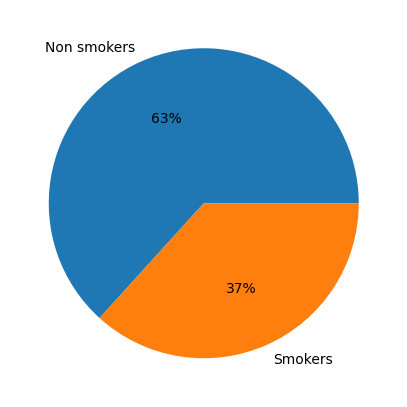

In [11]:
fig = plt.figure(figsize=(5, 10))
ax = fig.add_subplot(111)

data = df['smoking'].value_counts()
labels =['Non smokers','Smokers']

ax.pie(data, labels = labels, autopct='%.0f%%')
plt.show()


In [12]:
numerical_features = df.select_dtypes([float, int]).columns
df[df[numerical_features]==0].count()

gender                     0
age                        0
height(cm)                 0
weight(kg)                 0
waist(cm)                  0
systolic                   0
relaxation                 0
fasting_blood_sugar        0
Cholesterol                0
triglyceride               0
HDL                        0
LDL                        0
hemoglobin                 0
Urine protein              0
serum_creatinine           0
AST                        0
ALT                        0
Gtp                        0
oral                       0
dental_caries          43811
tartar                     0
smoking                35237
eyesight                   0
hearing                    0
dtype: int64

In [13]:
df.drop('oral', axis = 1, inplace = True)

## Plots

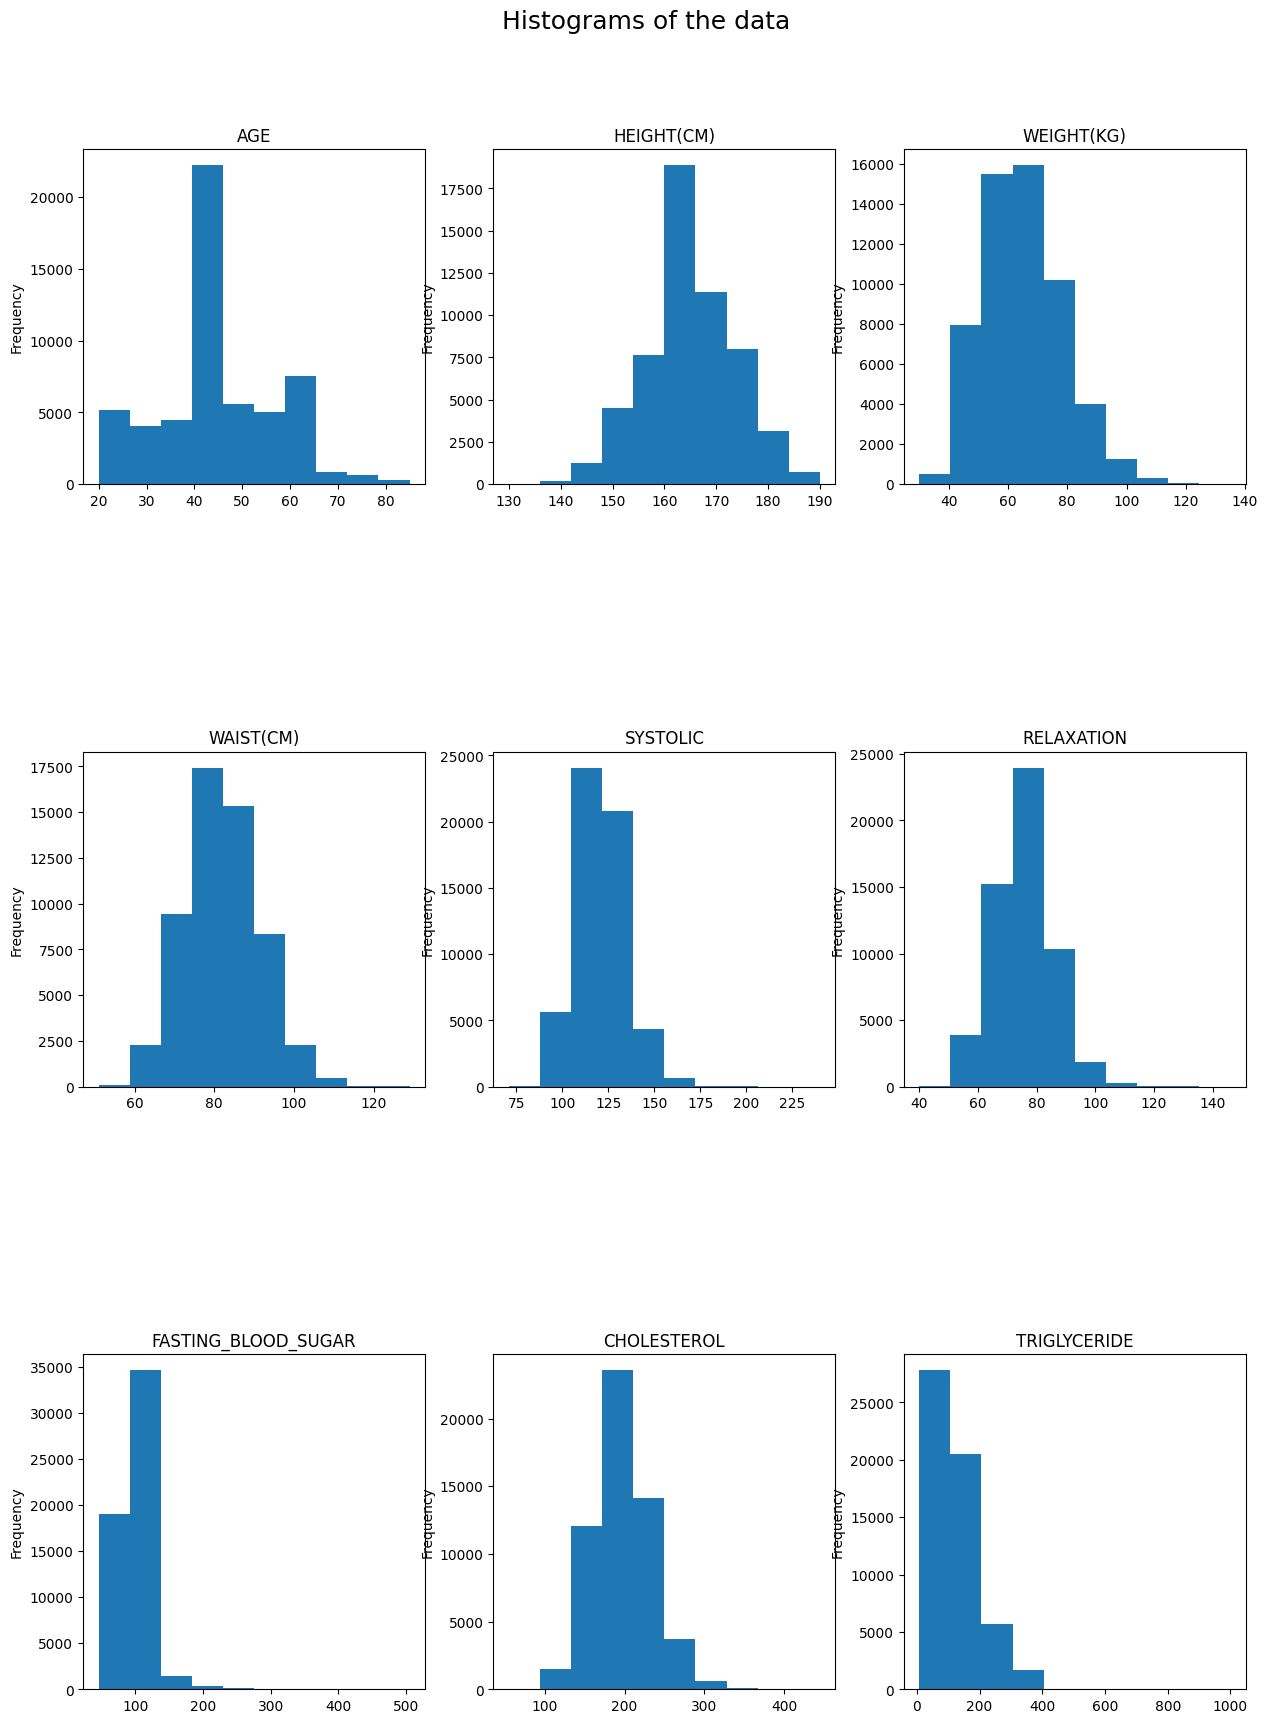

In [14]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
plt.subplots_adjust(hspace=.8)
fig.suptitle("Histograms of the data", fontsize=18, y=.95)


for col, ax in zip(numerical_features[:9], axs.ravel()):
    df[[col]].plot(ax=ax, kind= 'hist' )

    
    ax.set_title(col.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

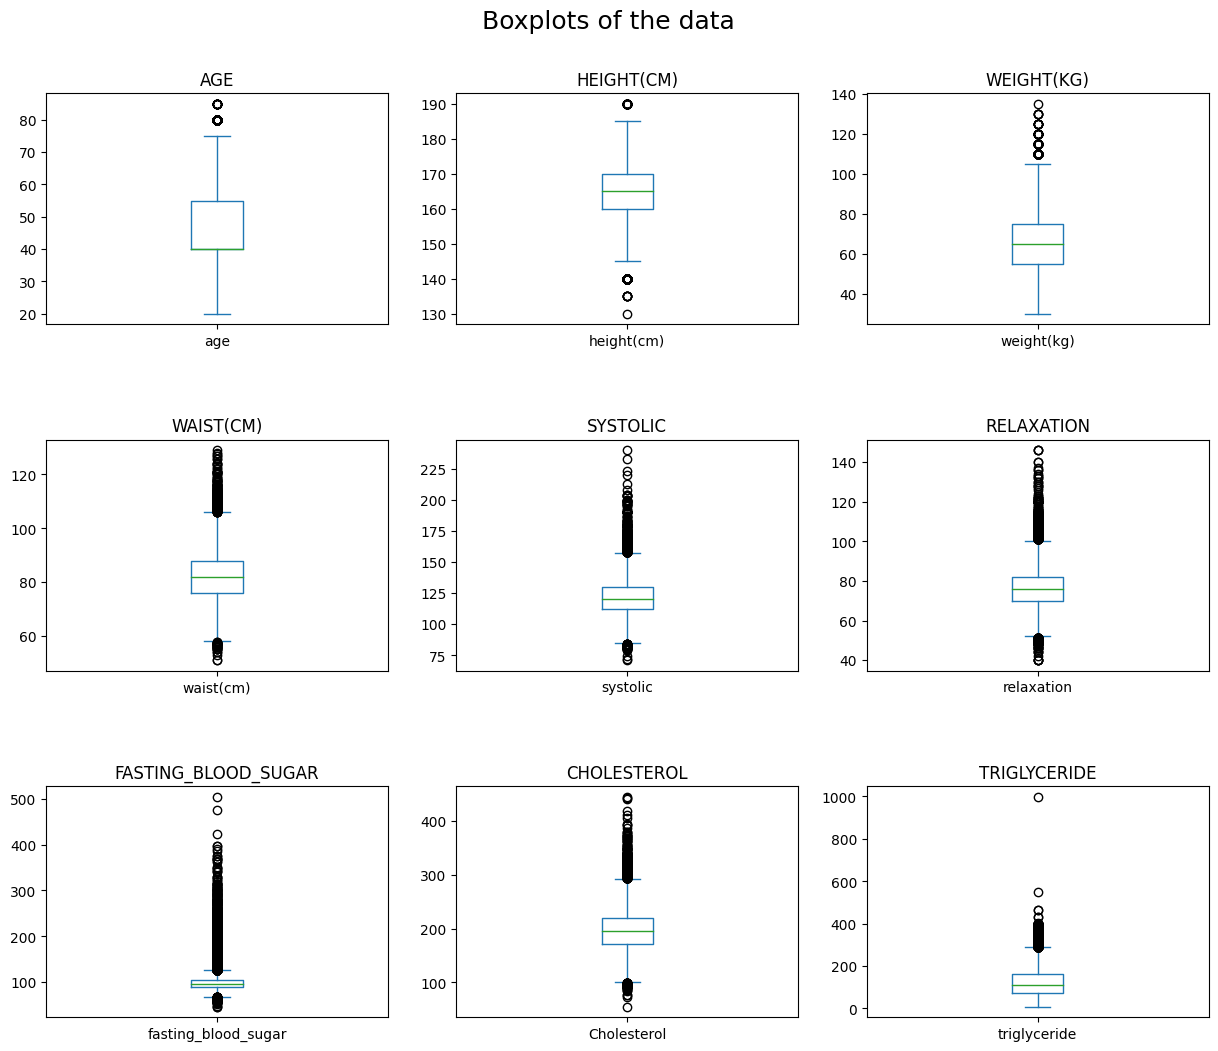

In [15]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Boxplots of the data", fontsize=18, y=0.95)


for col, ax in zip(numerical_features[:9], axs.ravel()):
    df[[col]].plot(ax=ax, kind= 'box' )

    
    ax.set_title(col.upper())
#     ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

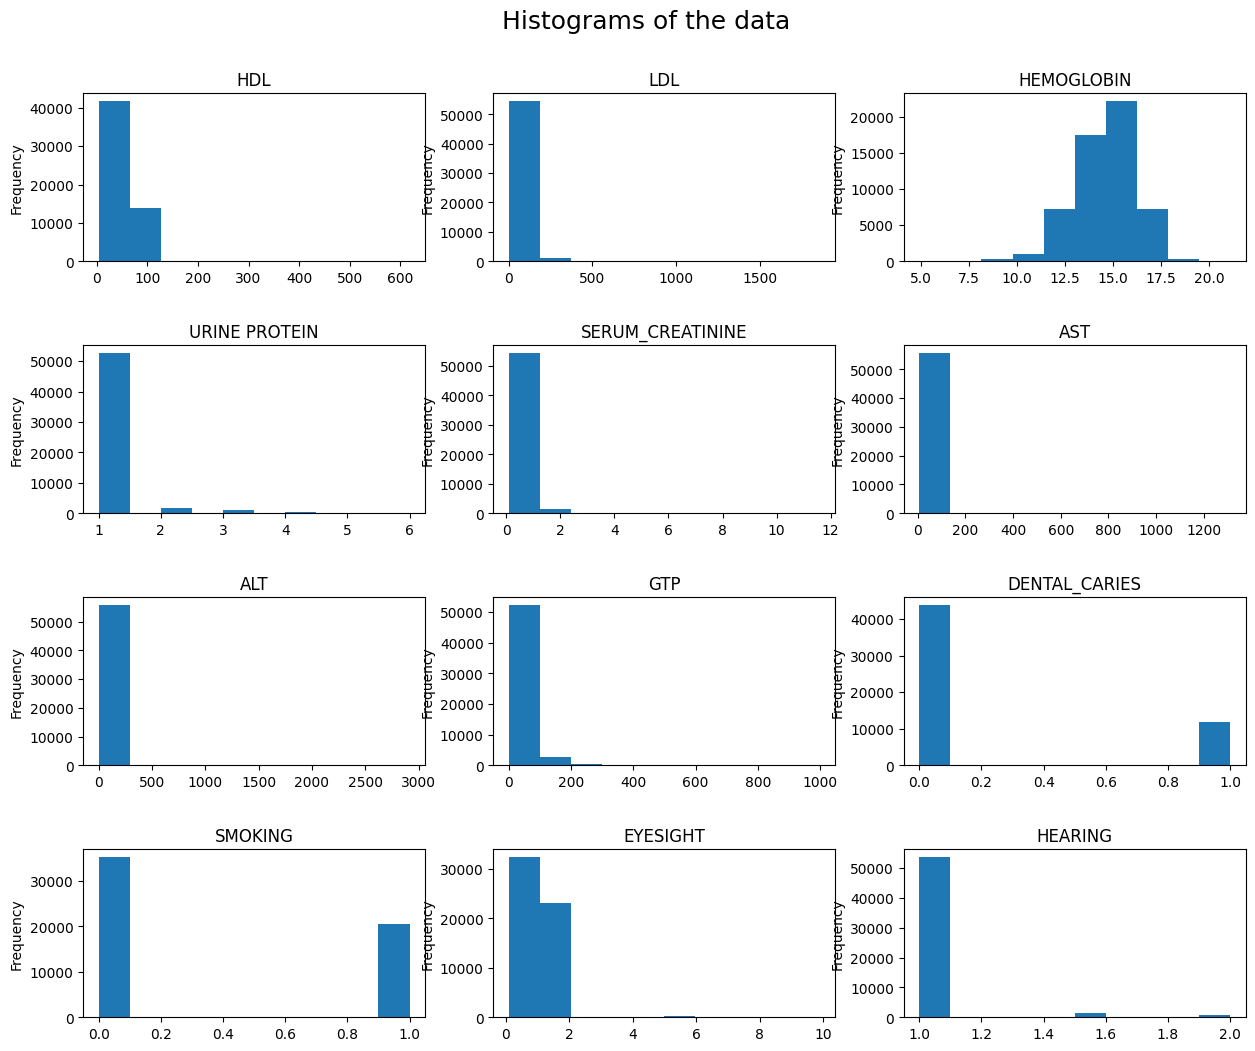

In [16]:
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Histograms of the data", fontsize=18, y=0.95)


for col, ax in zip(numerical_features[9:], axs.ravel()):
    df[[col]].plot(ax=ax, kind= 'hist' )

    
    ax.set_title(col.upper())
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

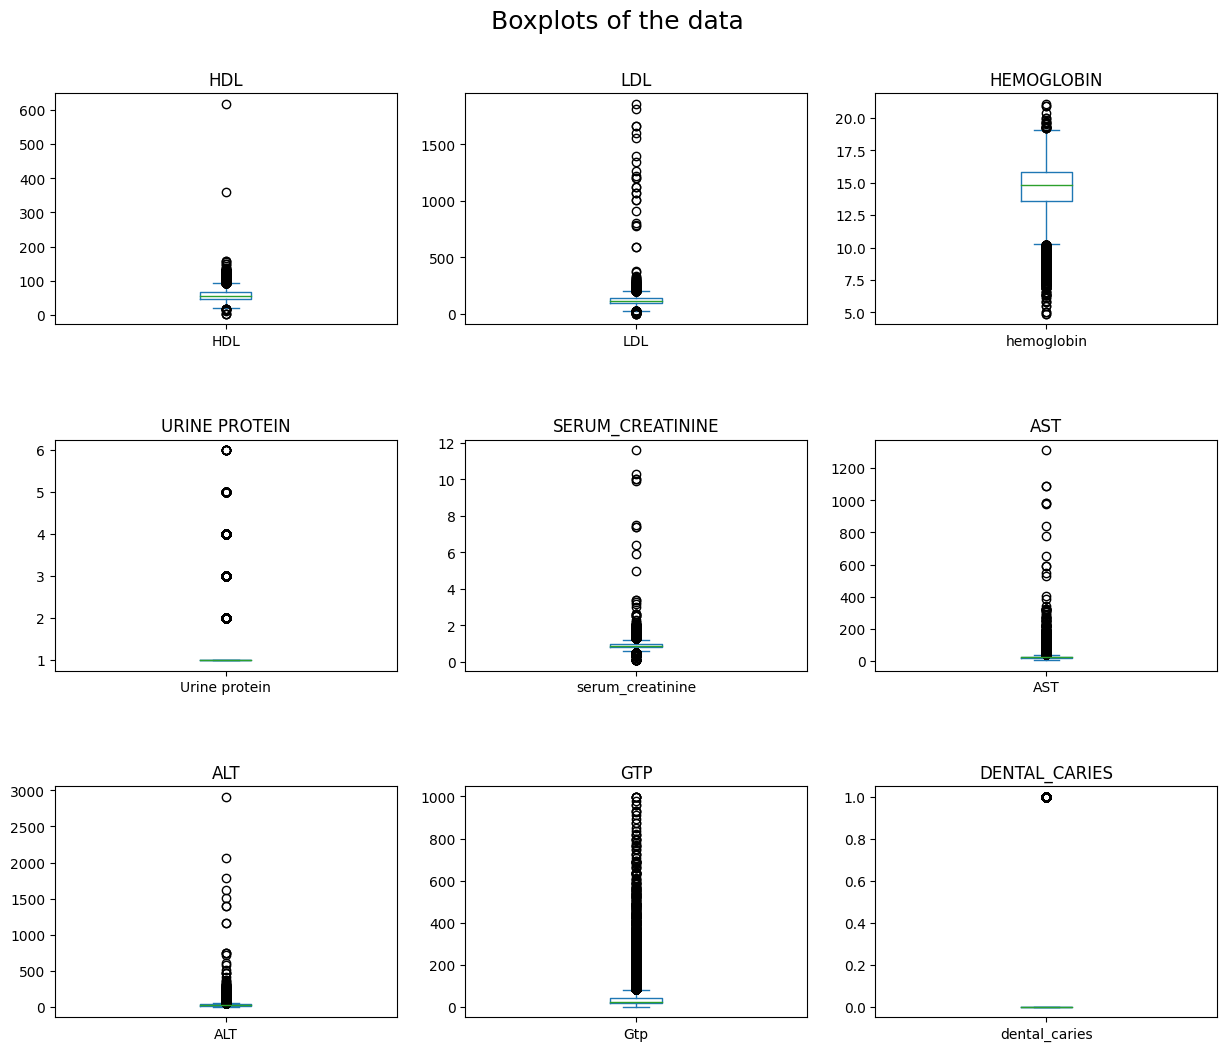

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Boxplots of the data", fontsize=18, y=0.95)


for col, ax in zip(numerical_features[9:], axs.ravel()):
    df[[col]].plot(ax=ax, kind= 'box' )

    
    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()


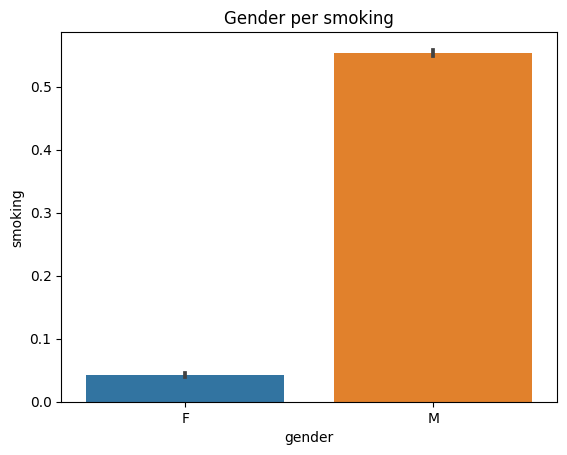

<Figure size 640x480 with 0 Axes>

In [18]:
#By eye, we can see that most smokers are men
sns.barplot(x='gender', y='smoking', data=df)
plt.title(f'Gender per smoking')
plt.show()
plt.clf()

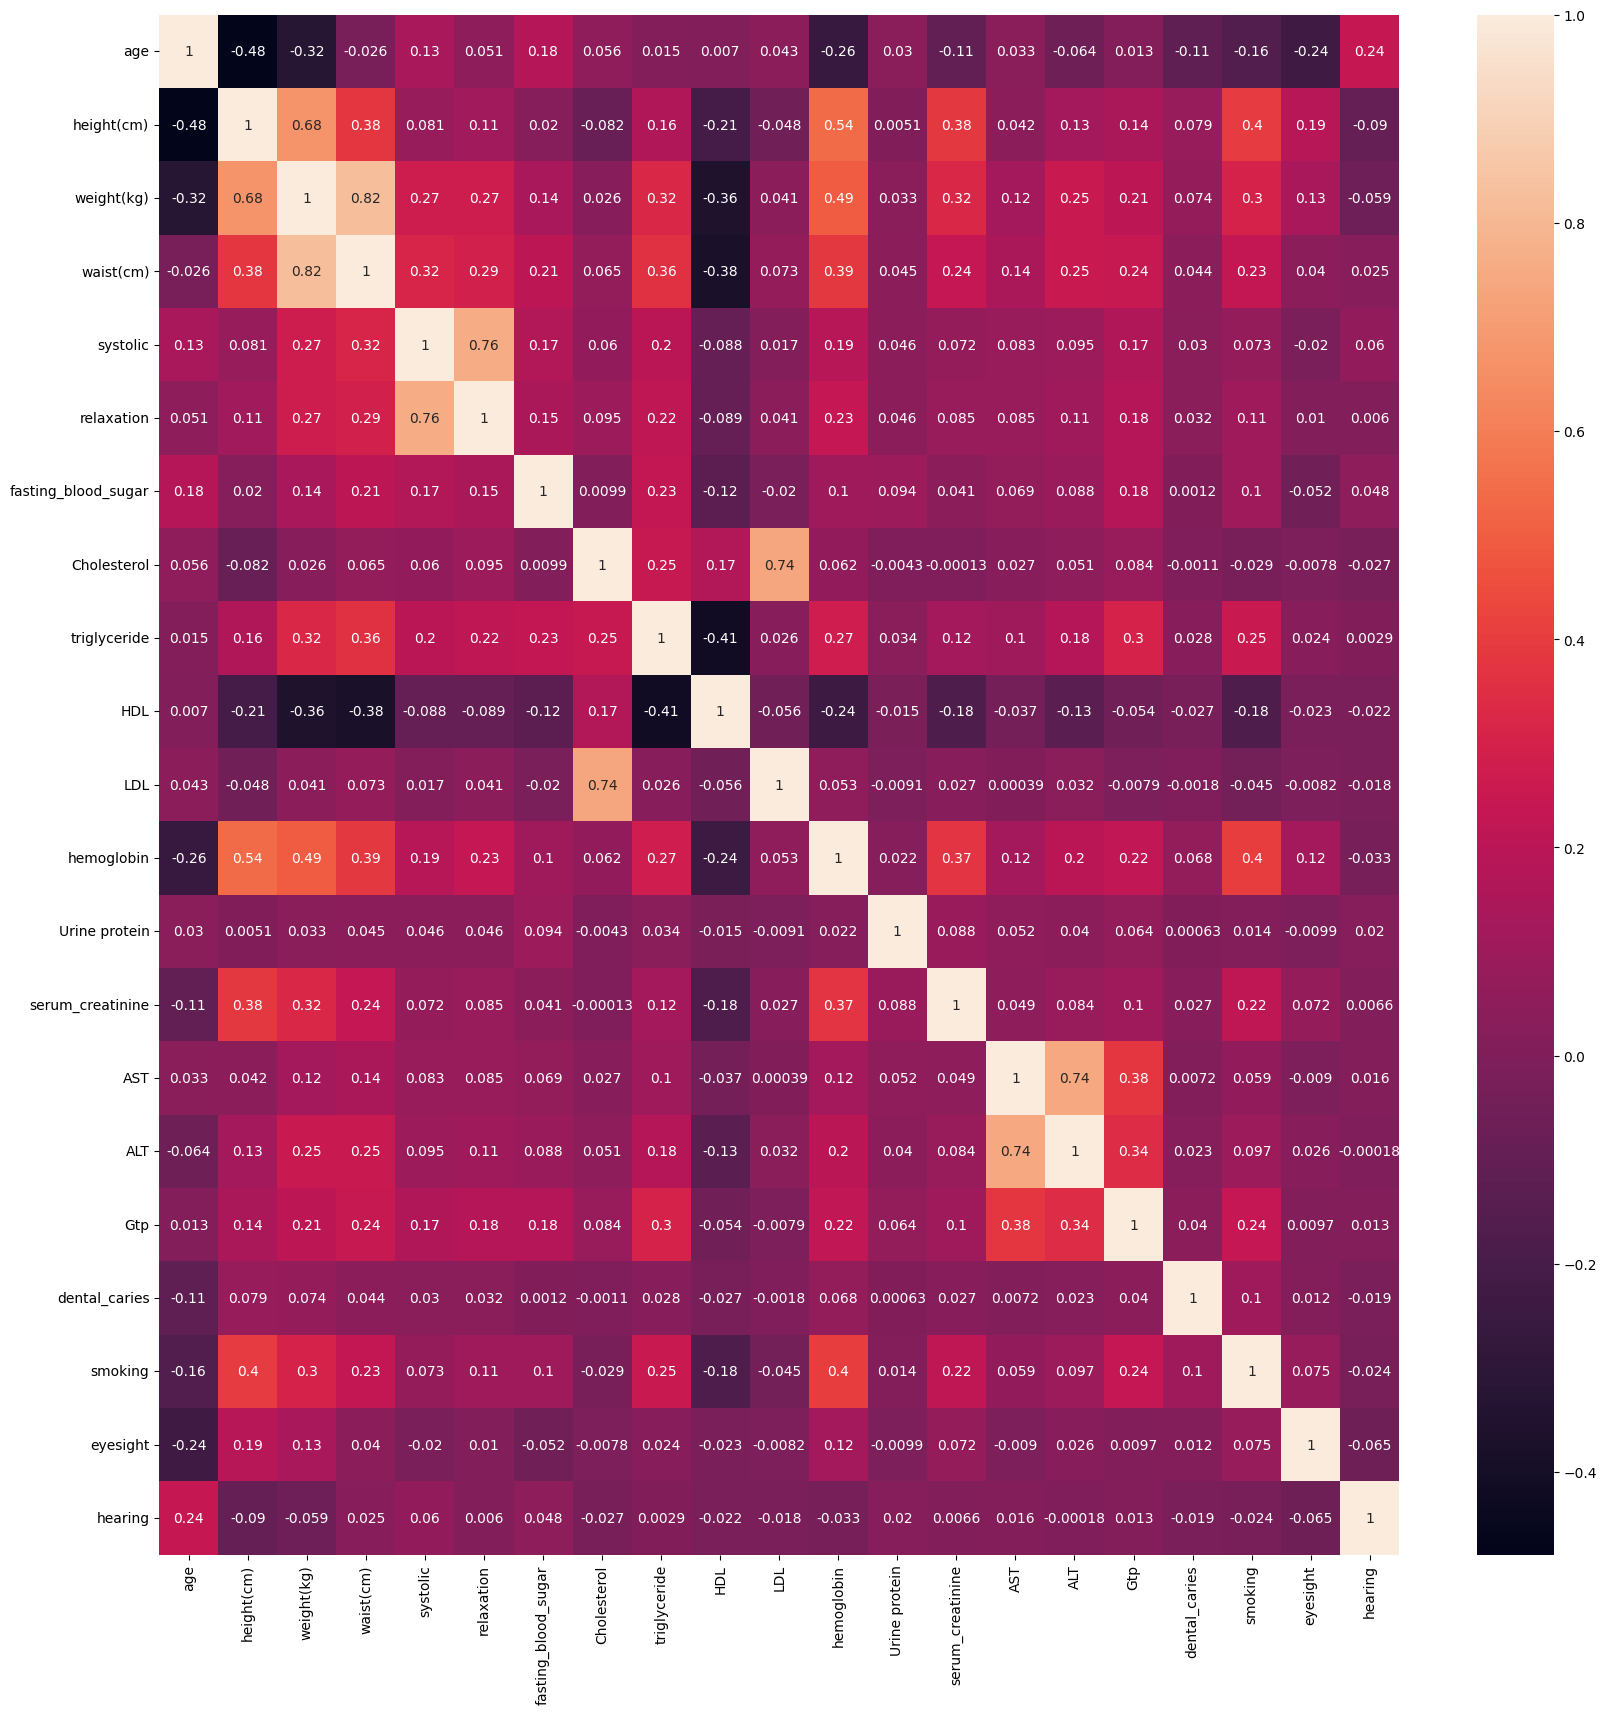

<Figure size 640x480 with 0 Axes>

In [19]:
plt.figure(figsize= (20,20))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()
plt.clf()

In [20]:
lbe = LabelEncoder()
lbe.fit_transform(df["gender"])
df["gender"] = lbe.fit_transform(df["gender"])
lbe = LabelEncoder()
lbe.fit_transform(df["tartar"])
df["tartar"] = lbe.fit_transform(df["tartar"])
lbe = LabelEncoder()    

In [21]:
df_ohe = pd.get_dummies(df, drop_first=True)
X = df_ohe.copy()
y = X.pop('smoking')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .1, random_state=42)

In [23]:
modelRF = RandomForestClassifier(n_jobs=6)
# defining parameter range
# parameters = { 'criterion': ['gini', 'entropy'],
#               'n_estimators' : [ 250, 500, 1000]}
 
parameters = {
    'criterion' : ['gini'],
    'n_estimators' : [1000]
}
grid = GridSearchCV(
    modelRF,
    parameters,
    refit = True,
    cv = 5,
    verbose = 3)
 
# fitting the model for grid search
model = grid.fit(X_train, y_train)
print('Best parameters for Random Forest Model:', grid.best_params_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .criterion=gini, n_estimators=1000;, score=0.821 total time=  26.2s
[CV 2/5] END .criterion=gini, n_estimators=1000;, score=0.835 total time=  22.7s
[CV 3/5] END .criterion=gini, n_estimators=1000;, score=0.828 total time=  22.7s
[CV 4/5] END .criterion=gini, n_estimators=1000;, score=0.826 total time=  24.4s
[CV 5/5] END .criterion=gini, n_estimators=1000;, score=0.829 total time=  23.3s
Best parameters for Random Forest Model: {'criterion': 'gini', 'n_estimators': 1000}


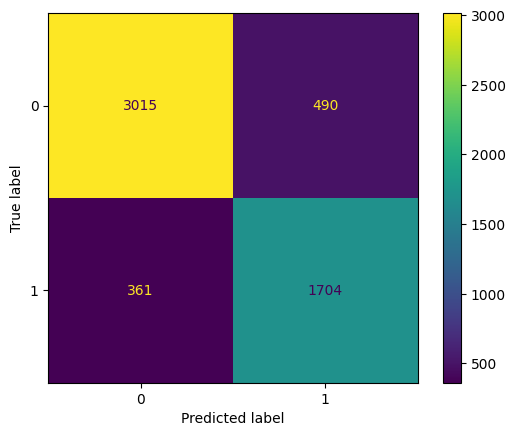

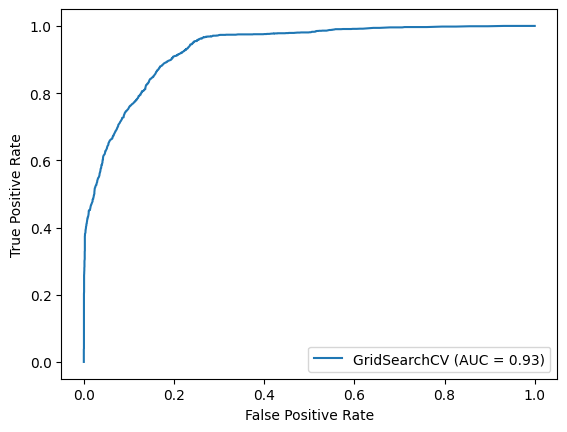

<Figure size 640x480 with 0 Axes>

In [24]:
#Confusion matrix
predictions = grid.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

#ROC curve
predictionsP = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, predictionsP[:, 1])
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=str(model).split('(')[0])
display.plot()
plt.show()
plt.clf()